In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno
%matplotlib inline

In [68]:
df = pd.read_csv('./dataset/pokemon_data.csv')
print(df.shape)
df.head()

(800, 12)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [69]:
df[df.isna().any(axis=1)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


# 1. Handling Missing Values

In [70]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

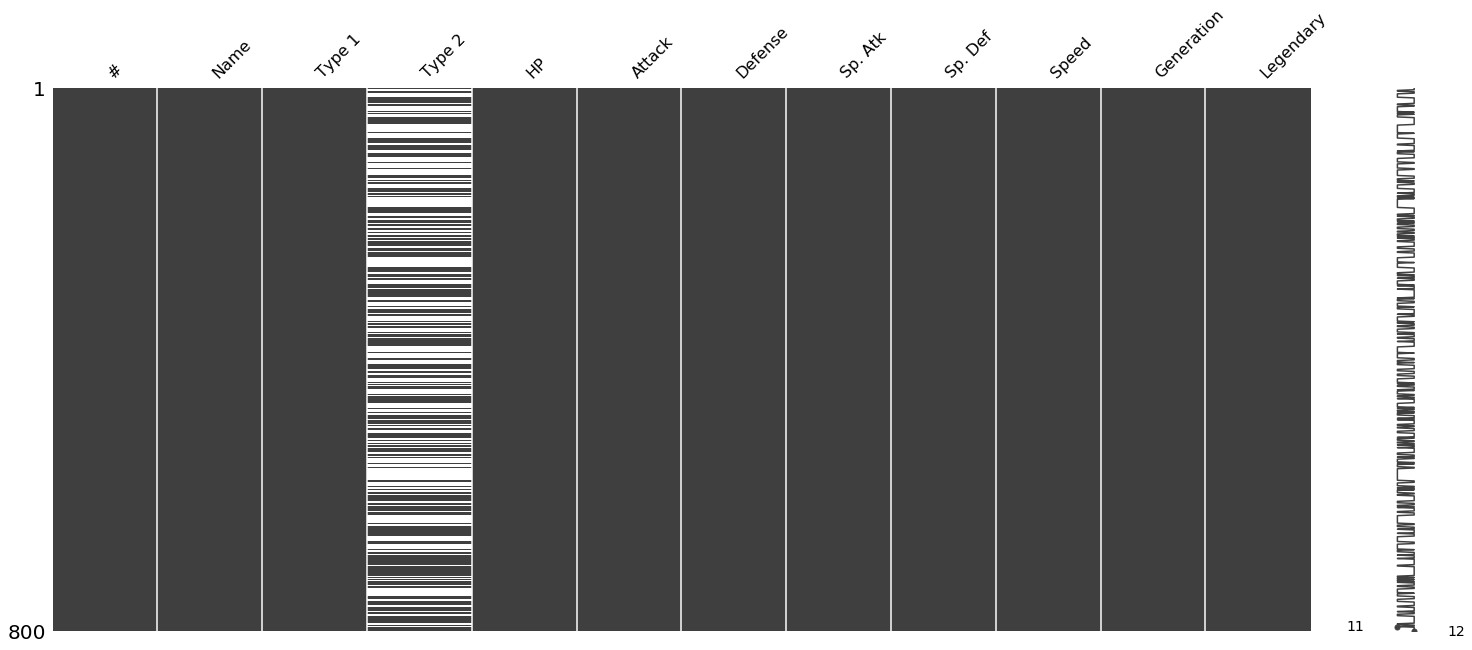

In [71]:
msno.matrix(df)
plt.show()

#### We can see that there are many NaN values(386) in Type 2 column. Let's fix it.

#### After few google searches, I found that the pokemons having NaN values in <em>Type 2</em> column doesn't even are of two types, they are of only one type thats why their <em>Type 2</em>

#### column is a NaN Value.

#### I can't drop those rows because it will ruin the dataset for further analysis. So I filled the <em>Type 2</em> values with <em>Type 1</em> values.

In [72]:
df['Type 2'].fillna(value=df['Type 1'], inplace=True)

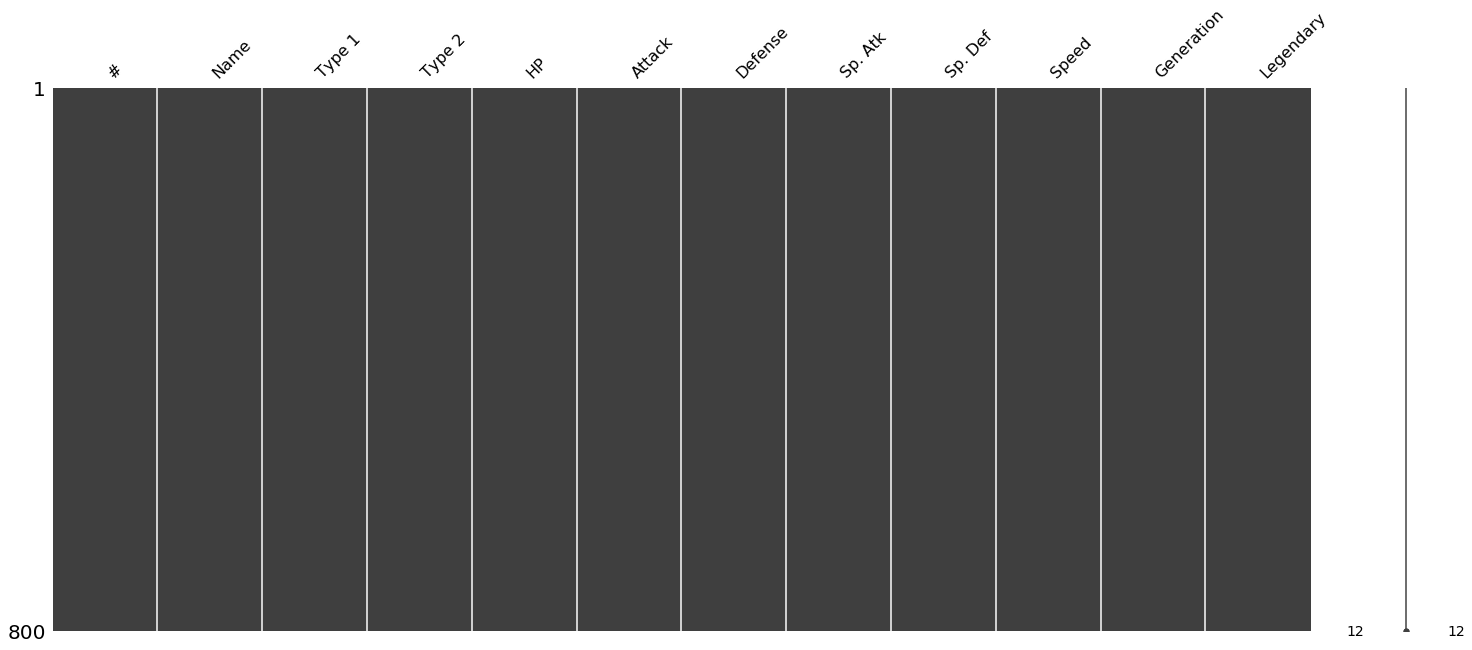

In [73]:
msno.matrix(df)
plt.show()

### Great, Our data is clean.